In [1]:
# Convolutional Neural Network
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets.mnist import load_data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
x_test.shape

(10000, 28, 28, 1)

In [7]:
# determine the shape of the input images
input_shape = x_train.shape[1:]
print(input_shape)

(28, 28, 1)


In [8]:
# determine the number of classes
n_classes = len(np.unique(y_train))
print(n_classes)

10


In [9]:
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [10]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [11]:
## define model 1
# model = Sequential()
# model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
# model.add(MaxPool2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dropout(0.5))
# model.add(Dense(n_classes, activation='softmax'))


## model 2
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform',\
                 input_shape=input_shape,padding="same"))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

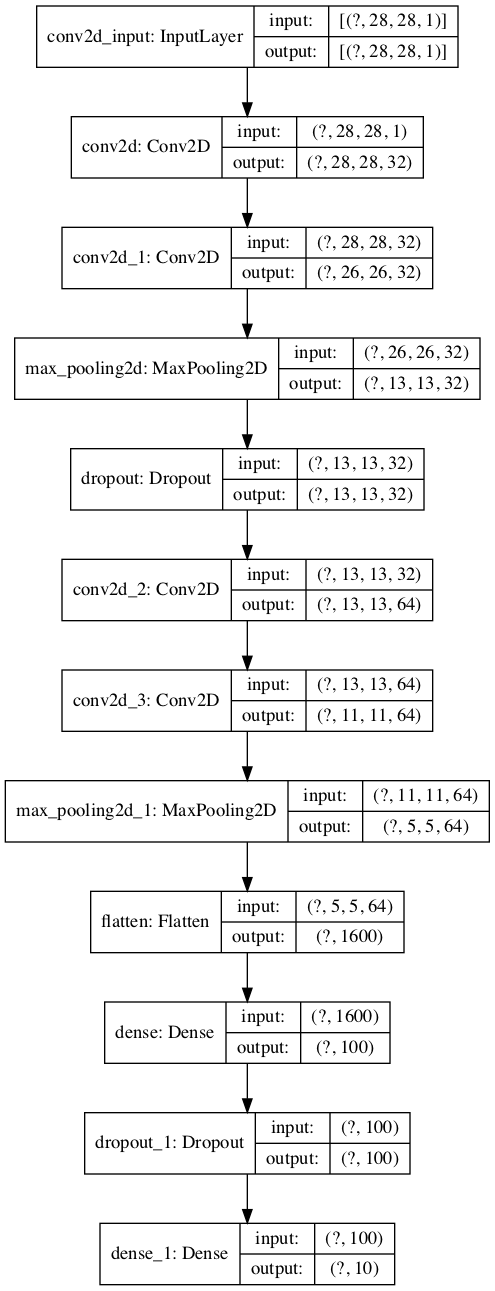

In [13]:
plot_model(model, 'model.png', show_shapes=True)

In [14]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# fit the model
#history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2,verbose=2)
history = model.fit(x_train, y_train, epochs=10, batch_size=128,\
                    validation_data=(x_val,y_val),verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 32s - loss: 0.2228 - accuracy: 0.9301 - val_loss: 0.0490 - val_accuracy: 0.9853
Epoch 2/10
48000/48000 - 31s - loss: 0.0648 - accuracy: 0.9806 - val_loss: 0.0361 - val_accuracy: 0.9895
Epoch 3/10
48000/48000 - 32s - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0317 - val_accuracy: 0.9909
Epoch 4/10
48000/48000 - 31s - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0291 - val_accuracy: 0.9915
Epoch 5/10
48000/48000 - 30s - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0343 - val_accuracy: 0.9904
Epoch 6/10
48000/48000 - 33s - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0293 - val_accuracy: 0.9905
Epoch 7/10
48000/48000 - 37s - loss: 0.0203 - accuracy: 0.9933 - val_loss: 0.0320 - val_accuracy: 0.9914
Epoch 8/10
48000/48000 - 34s - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0391 - val_accuracy: 0.9897
Epoch 9/10
48000/48000 - 32s - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0316 - val_accuracy: 0.9927
Epoch

Text(0.5, 0, 'epoch')

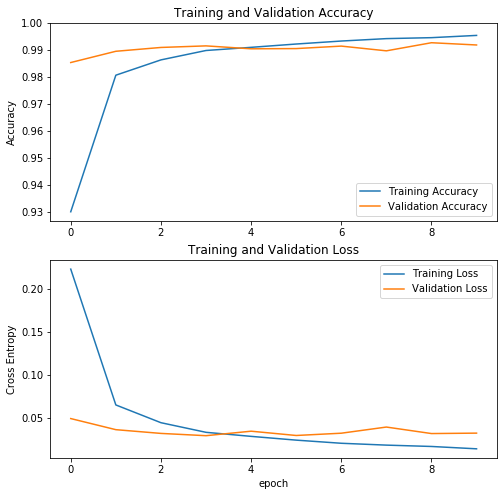

In [16]:
# Learning curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

In [17]:
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.992


In [18]:
# make a prediction
itest = 1
yhat = model.predict([[x_test[itest]]])
print('Predicted: class=%d' % np.argmax(yhat))

Predicted: class=2


In [19]:
print('Actual: class=%d' % y_test[itest])

Actual: class=2


In [20]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [21]:
y_pred = model.predict(x_test)

In [22]:
y_pred.shape

(10000, 10)

In [23]:
y_pred = np.argmax(y_pred, axis = 1)

In [24]:
y_pred.shape

(10000,)

In [25]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [27]:
conf_matrix

array([[ 977,    0,    0,    0,    0,    0,    1,    1,    0,    1],
       [   0, 1134,    0,    0,    0,    0,    0,    1,    0,    0],
       [   1,    1, 1025,    0,    0,    0,    0,    5,    0,    0],
       [   0,    0,    0, 1004,    0,    3,    0,    1,    2,    0],
       [   0,    0,    0,    0,  968,    0,    0,    2,    1,   11],
       [   0,    0,    0,    4,    0,  886,    1,    1,    0,    0],
       [   2,    4,    0,    0,    1,    1,  947,    0,    3,    0],
       [   0,    4,    2,    0,    0,    0,    0, 1018,    1,    3],
       [   3,    0,    2,    1,    0,    1,    0,    0,  964,    3],
       [   1,    0,    1,    0,    4,    1,    0,    1,    1, 1000]])